In [32]:
%matplotlib widget
from main import *
import matplotlib.pyplot as plt
import sympy as sp
from sympy import Heaviside, sin, cos, pi
sp.init_printing()

In [33]:
Vin = 6
fs = 100e3 #Hz
D = 0.25
switch = cos(2 * pi * fs * t) - 1 + 2 * D
#switch = 2 * Heaviside(t - 1e-6) - 1

Vout = 1.5
Iout = 0.5

In [34]:
acTest = Solver.Circuit("buck")
acTest.element(
                    VoltageSource("Vin", {"V+" : "Vin", "V-" : Gnd}, V_t = Vin),
                    
                    Relay("S", {"V1" : "Vin", "V2" : "Vs", "V+" : "S", "V-" : Gnd}),                    
                    VoltageSource("Vs", {"V+" : "S", "V-" : Gnd}, V_t = switch),
                    
                    Diode("D1", {"Vp" : Gnd, "Vn" : "Vs"}, Vd = 0),
                    
                    Inductor("L1", {"V1" : "Vs", "V2" : "Vout"}, L = 5e-6, I0 = Iout),
                    #Resistor("R1", {"V1" : "Vs", "V2" : "Vout"}, R = 1),

                    Capacitor("C1", {"V1" : "Vout", "V2" : Gnd}, C = 10e-6, V0 = Vout),
                    
                    CurrentSource("Iout", {"V+" : "Vout", "V-" : Gnd}, I_t = -Iout),
                    #Resistor("Rout", {"V1" : "Vs", "V2" : Gnd}, R = 3),
)

{'Vin': {'name': 'Vin', 'type': 'VoltageSource', 'nodes': {'V+': 'Vin', 'V-': 0}, 'values': {'Vdc': 0, 'Vac': 0, 'V_t': 6}},
 'S': {'name': 'S', 'type': 'Relay', 'nodes': {'V1': 'Vin', 'V2': 'Vs', 'V+': 'S', 'V-': 0}, 'values': {'Vs': 0}},
 'Vs': {'name': 'Vs', 'type': 'VoltageSource', 'nodes': {'V+': 'S', 'V-': 0}, 'values': {'Vdc': 0, 'Vac': 0, 'V_t': cos(200000*pi*t) - 0.5}},
 'D1': {'name': 'D1', 'type': 'Diode', 'nodes': {'Vp': 0, 'Vn': 'Vs'}, 'values': {'Vd': 0, 'T': 300}},
 'L1': {'name': 'L1', 'type': 'Inductor', 'nodes': {'V1': 'Vs', 'V2': 'Vout'}, 'values': {'L': 5e-06, 'I0': 0.5}},
 'C1': {'name': 'C1', 'type': 'Capacitor', 'nodes': {'V1': 'Vout', 'V2': 0}, 'values': {'C': 1e-05, 'V0': 1.5}},
 'Iout': {'name': 'Iout', 'type': 'CurrentSource', 'nodes': {'V+': 'Vout', 'V-': 0}, 'values': {'Idc': 0, 'Iac': 0, 'I_t': -0.5}}}

In [35]:
Solver.setMain("buck")

{'elements': {'C1': {'name': 'C1', 'type': 'Capacitor', 'nodes': {'V1': 'Vout', 'V2': 0}, 'values': {'C': 1e-05, 'V0': 1.5}},
              'D1': {'name': 'D1', 'type': 'Diode', 'nodes': {'Vp': 0, 'Vn': 'Vs'}, 'values': {'Vd': 0, 'T': 300}},
              'Iout': {'name': 'Iout', 'type': 'CurrentSource', 'nodes': {'V+': 'Vout', 'V-': 0}, 'values': {'Idc': 0, 'Iac': 0, 'I_t': -0.5}},
              'L1': {'name': 'L1', 'type': 'Inductor', 'nodes': {'V1': 'Vs', 'V2': 'Vout'}, 'values': {'L': 5e-06, 'I0': 0.5}},
              'S': {'name': 'S', 'type': 'Relay', 'nodes': {'V1': 'Vin', 'V2': 'Vs', 'V+': 'S', 'V-': 0}, 'values': {'Vs': 0}},
              'Vin': {'name': 'Vin', 'type': 'VoltageSource', 'nodes': {'V+': 'Vin', 'V-': 0}, 'values': {'Vdc': 0, 'Vac': 0, 'V_t': 6}},
              'Vs': {'name': 'Vs', 'type': 'VoltageSource', 'nodes': {'V+': 'S', 'V-': 0}, 'values': {'Vdc': 0, 'Vac': 0, 'V_t': cos(200000*pi*t) - 0.5}}},
 'nodes': {'S', 'Vout', 'Vin', 'Vs'}}

In [36]:
tstep = 1e-9

In [37]:
compiled = Solver.compile()
simulatorState1 = solveLaplace(compiled, tmax=5e-5, tstep=tstep, debugLog = 0)

vvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvv
1.6670000000000435e-06 						
1.6666667480469186e-06 						
^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
vvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvv
7.026666748045961e-06 							
7.026400131224671e-06 						
^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
vvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvv
8.333400131224813e-06 							
8.33333348083419e-06 						
^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
vvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvv
1.1667333480835852e-05 						
1.1666666732788977e-05 						
^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
vvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvv
1.7116666732788547e-05 						
1.7116196273804172e-05 						
^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
vvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvv
1.8334196273802716e-05 						
1.8333333358763654e-05 						
^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
vvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvv
2.166733335875967e-

In [38]:
simulatorState2 = solveLaplace(compiled, tmax=10e-5, tstep=tstep, debugLog = 0, simulatorState=simulatorState1)

Starting from time = 0.0000483333333893058
vvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvv
5.16673333893131e-5 						
5.16666667633365e-5 						
^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
vvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvv
5.43996667633425e-5 						
5.43992213898073e-5 						
^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
vvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvv
5.83342213898160e-5 						
5.83333334503628e-5 						
^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
vvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvv
6.16673334503701e-5 						
6.16666667023233e-5 						
^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
vvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvv
6.42896667023290e-5 						
6.42894630280126e-5 						
^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
vvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvv
6.83334630280215e-5 						
6.83333333893496e-5 						
^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
vvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvv
7.1667333

In [42]:
printModel(simulatorState2[0], var=t, measurments={compiled["currents"]["L1"]["V1"]})

{('D1', 'Cut'), ('S', 'Closed')}
t ∈ Interval.Ropen(0, 0.00000166666674804692)
I4_0  : 
(9⋅√2⋅sin(100000⋅√2⋅t) + 1)⋅U(t)
────────────────────────────────
               2                
-------------------------------------
{('D1', 'Fwd'), ('S', 'Open')}
t ∈ Interval.Ropen(0.00000166666674804692, 0.00000702640013122467)
I4_0  : 
(-649768951600653⋅√2⋅sin(100000⋅√2⋅t) + 594459884632972⋅cos(100000⋅√2⋅t) + 200
──────────────────────────────────────────────────────────────────────────────
                                        400000000000000                       

000000000000)⋅U(t)
──────────────────
                  
-------------------------------------
{('D1', 'Cut'), ('S', 'Open')}
t ∈ Interval.Ropen(0.00000702640013122467, 0.00000833333348083419)
I4_0  : 
0
-------------------------------------
{('D1', 'Cut'), ('S', 'Closed')}
t ∈ Interval.Ropen(0.00000833333348083419, 0.0000116666667327890)
I4_0  : 
(83264491018641⋅√2⋅sin(100000⋅√2⋅t) - 10000000000000⋅cos(100000⋅√2⋅t) + 100000
─

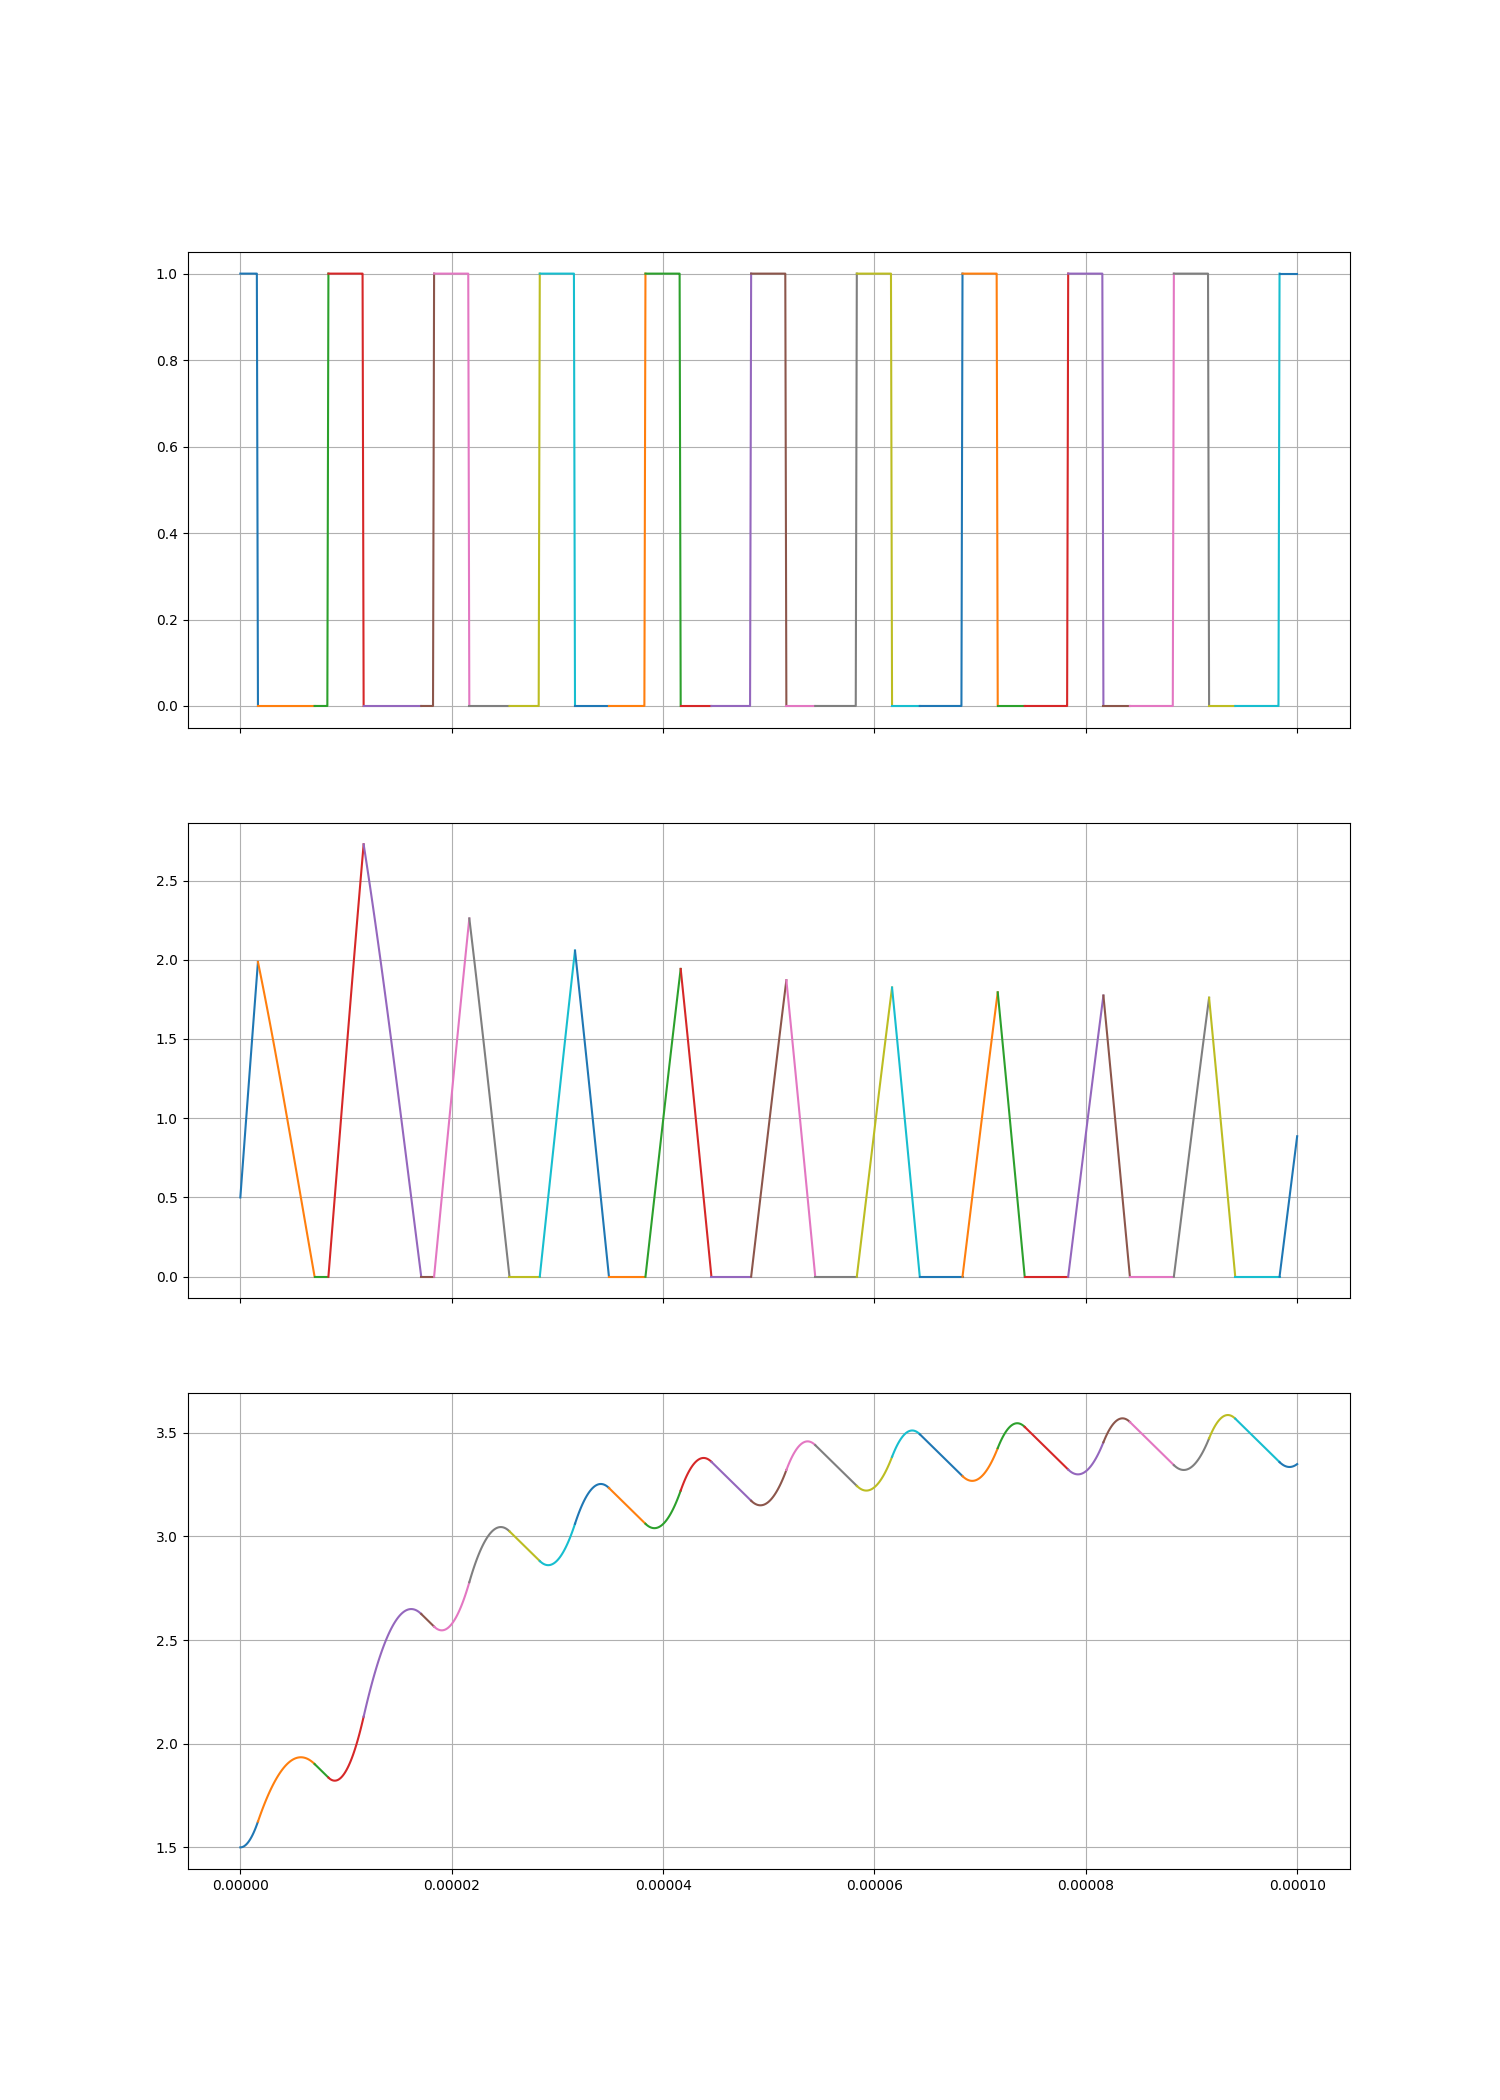

In [41]:
model1, _ = simulatorState1
model2, _ = simulatorState2

S = compiled["nodes"]["S"]

Vs = compiled["nodes"]["Vs"]

Vin = compiled["nodes"]["Vin"]

Iin = compiled["currents"]["S"]["V1"]

Vout = compiled["nodes"]["Vout"]

IL = compiled["currents"]["L1"]["V1"]

fig, axs = plt.subplots(3, figsize=[15, 21], sharex='all')

tmax = 1e-4
tstep = 1e-7

plotTranMeasurments(model2, 0, tmax, tstep, [(t0, S >= 0, "S(t)"),], axs[0])
#plotTranMeasurments(model2, 0, tmax, tstep, [(t0, S >= 0, "S(t)"),], axs[1])

plotTranMeasurments(model2, 0, tmax, tstep, [(t0, Vout, "Vout(t)"),], axs[2])
plotTranMeasurments(model2, 0, tmax, tstep, [(t0, IL, "IL(t)"),], axs[1])
#plotTranMeasurments(model2, 0, tmax, tstep, [(t0, Vout, "Vout(t)"),], axs[2])

for ax in axs:
    ax.grid(True)
    #ax.legend(loc="best")

plt.show()